In [191]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno

In [2]:
#MFCC, look it up. Similar to Fourier mapping but more coarse grained.

In [49]:
# Need a function to remove dead space from audio files
# Checks a rolling average of signal over 1/10 sec and compares to threshold
# Returns a mask of True and False values that can be used to filter audio signals

def envelope(y, sr, threshold):
    mask = []
    y_abs = pd.Series(y).apply(np.abs)
    y_mean = y_abs.rolling(window = int(sr/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(y[mask])

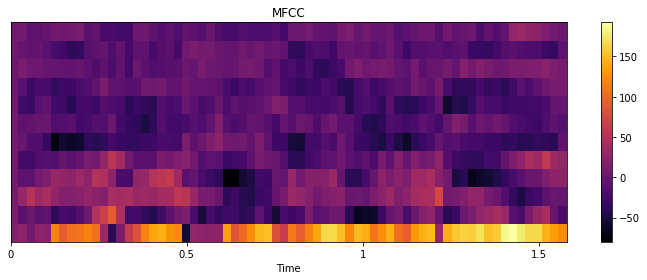

In [364]:
# Actor 1, male, very happy
filename = 'RAVDESS/Actor_01/03-01-03-02-01-01-01.wav'

y1, sr = librosa.load(filename)

y1 = envelope(y1, sr, 0.0005)

mfcc1 = librosa.feature.mfcc(y1,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc1[1:13], x_axis='time', cmap = 'inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [51]:
y1.shape[0]/sr

1.691655328798186

In [52]:
mfcc1.shape[1] * 1/40

1.7

In [53]:
IPython.display.Audio(y1, rate=sr)

Tempo: 123.046875BPM


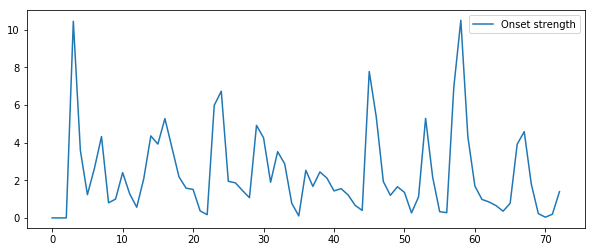

In [54]:
# Compute local onset autocorrelation
oenv1 = librosa.onset.onset_strength(y=y1, sr=sr)

# Estimate the global tempo for display purposes
tempo1 = librosa.beat.tempo(onset_envelope=oenv1, sr=sr)[0]

print("Tempo: " + str(tempo1) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv1, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

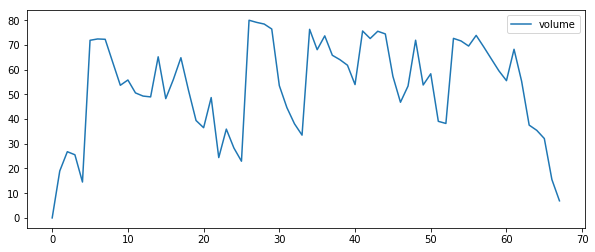

In [55]:
# Determine volume per frame
# Volume is a rather tricky metric due to how humans perceive sound
# This code computes the power spectrogram, sums the power components, then converts the power to db scale
# This should be a fairly realistic representation version of volume

S = librosa.stft(y1, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness1 = librosa.power_to_db(p_sum)
n_frames1 = loudness1.shape[1]

loudness1 = loudness1 - loudness1.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames1), loudness1.reshape(n_frames1,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

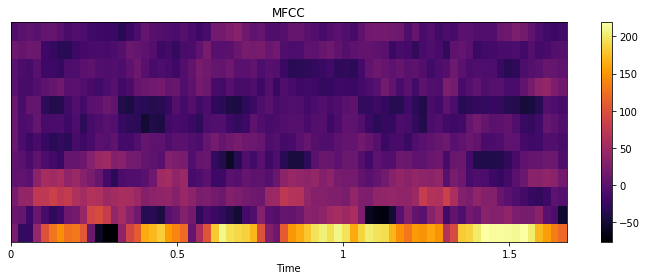

In [56]:
# Actor 1, male, very sad
filename = 'RAVDESS/Actor_01/03-01-04-02-01-01-01.wav'

y2, sr = librosa.load(filename)

y2 = envelope(y2, sr, 0.0005)

mfcc2 = librosa.feature.mfcc(y2,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc2[1:13], x_axis='time', cmap = 'inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [57]:
IPython.display.Audio(y2, rate=sr)

Tempo: 103.359375BPM


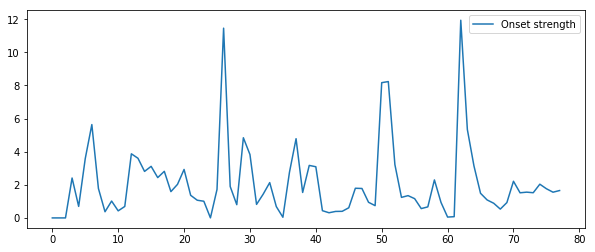

In [58]:
# Compute local onset autocorrelation
oenv2 = librosa.onset.onset_strength(y=y2, sr=sr)

# Estimate the global tempo for display purposes
tempo2 = librosa.beat.tempo(onset_envelope=oenv2, sr=sr)[0]

print("Tempo: " + str(tempo2) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv2, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

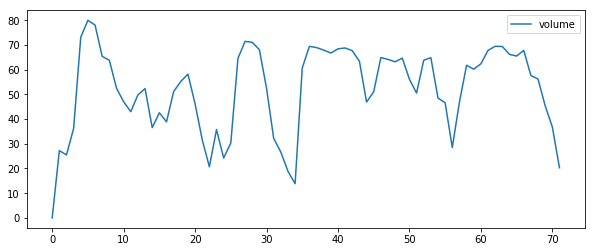

In [59]:
S = librosa.stft(y2, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness2 = librosa.power_to_db(p_sum)
n_frames2 = loudness2.shape[1]

loudness2 = loudness2 - loudness2.min() 

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames2), loudness2.reshape(n_frames2,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

In [60]:
# MFCCs don't look too different between happy vs sad. Tempo is significantly different here. Much slower for sad!

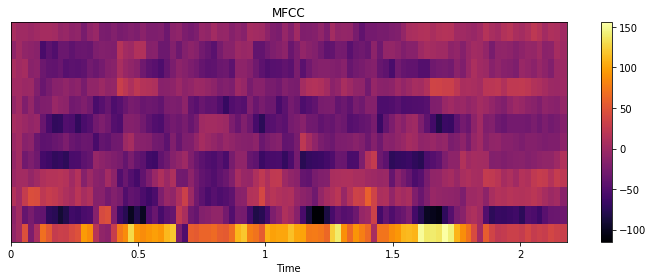

In [61]:
# Actress 10, female, very happy
filename = 'RAVDESS/Actor_10/03-01-03-02-01-01-10.wav'

y3, sr = librosa.load(filename)

y3 = envelope(y3, sr, 0.0005)

mfcc3 = librosa.feature.mfcc(y3,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc3[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [62]:
IPython.display.Audio(y3, rate=sr)

Tempo: 123.046875BPM


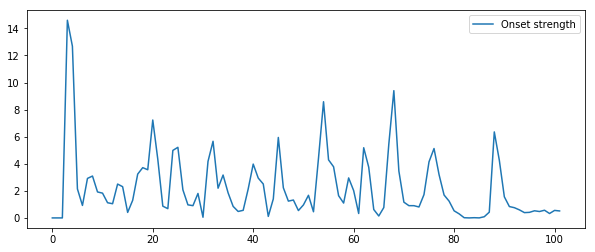

In [63]:
# Compute local onset autocorrelation
oenv3 = librosa.onset.onset_strength(y=y3, sr=sr)

# Estimate the global tempo for display purposes
tempo3 = librosa.beat.tempo(onset_envelope=oenv3, sr=sr)[0]

print("Tempo: " + str(tempo3) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv3, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

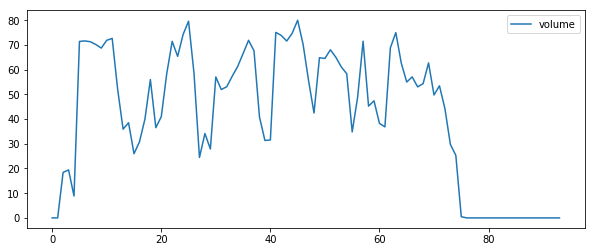

In [64]:
S = librosa.stft(y3, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness3 = librosa.power_to_db(p_sum)
n_frames3 = loudness3.shape[1]

loudness3 = loudness3 - loudness3.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames3), loudness3.reshape(n_frames3,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

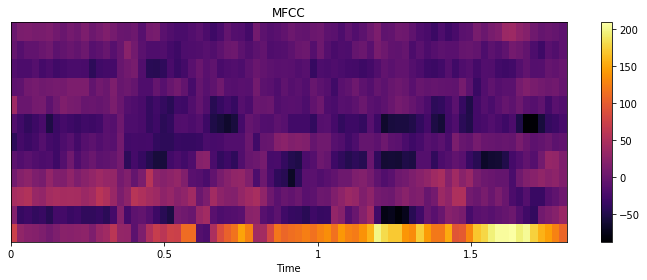

In [65]:
# Actress 10, female, very sad
filename = 'RAVDESS/Actor_10/03-01-04-02-01-01-10.wav'

y4, sr = librosa.load(filename)

y4 = envelope(y4, sr, 0.0005)

mfcc4 = librosa.feature.mfcc(y4,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc4[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [66]:
IPython.display.Audio(y4, rate=sr)

Tempo: 135.99917763157896BPM


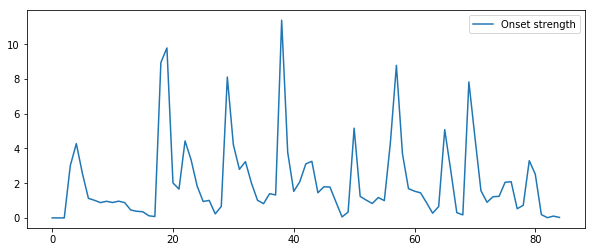

In [67]:
# Compute local onset autocorrelation
oenv4 = librosa.onset.onset_strength(y=y4, sr=sr)

# Estimate the global tempo for display purposes
tempo4 = librosa.beat.tempo(onset_envelope=oenv4, sr=sr)[0]

print("Tempo: " + str(tempo4) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv4, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

In [68]:
# MFCCs are fairly different for this female actor. Tempo is different too but faster in this case for the sad.

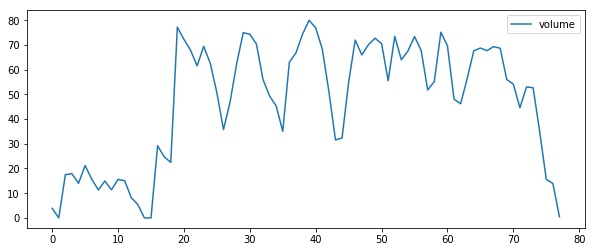

In [69]:
S = librosa.stft(y4, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness4 = librosa.power_to_db(p_sum)
n_frames4 = loudness4.shape[1]

loudness4 = loudness4 - loudness4.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames4), loudness4.reshape(n_frames4,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

In [70]:
# Overlay volume and oenv of happy and sad recordings

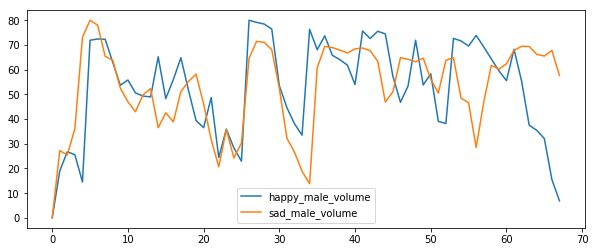

In [71]:
min_frames = min(n_frames1, n_frames2)
happy_vol = loudness1[0,0:min_frames]
sad_vol = loudness2[0,0:min_frames]

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), happy_vol.reshape(min_frames,), label = 'happy_male_volume')
sns.lineplot(range(min_frames), sad_vol.reshape(min_frames,), label = 'sad_male_volume')
plt.legend(frameon=True)
plt.axis('tight');

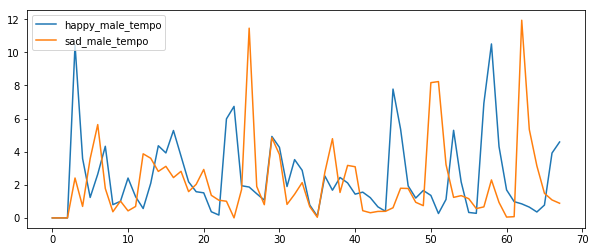

In [72]:
plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), oenv1[0:min_frames], label = 'happy_male_tempo')
sns.lineplot(range(min_frames), oenv2[0:min_frames], label = 'sad_male_tempo')
plt.legend(frameon=True)
plt.axis('tight');

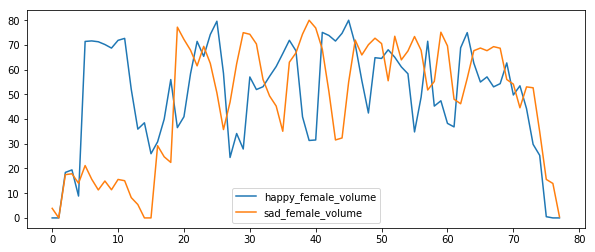

In [73]:
min_frames = min(n_frames3, n_frames4)
happy_vol = loudness3[0,0:min_frames]
sad_vol = loudness4[0,0:min_frames]

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), happy_vol.reshape(min_frames,), label = 'happy_female_volume')
sns.lineplot(range(min_frames), sad_vol.reshape(min_frames,), label = 'sad_female_volume')
plt.legend(frameon=True)
plt.axis('tight');

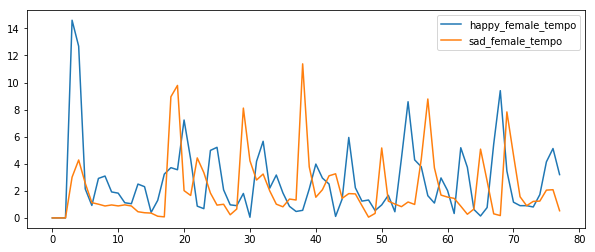

In [74]:
plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), oenv3[0:min_frames], label = 'happy_female_tempo')
sns.lineplot(range(min_frames), oenv4[0:min_frames], label = 'sad_female_tempo')
plt.legend(frameon=True)
plt.axis('tight');

In [75]:
# Lets look at deltas for our volume and MFCC features

In [76]:
deltas1 = librosa.feature.delta(loudness1)
deltas2 = librosa.feature.delta(loudness2)
deltas3 = librosa.feature.delta(loudness3)
deltas4 = librosa.feature.delta(loudness4)

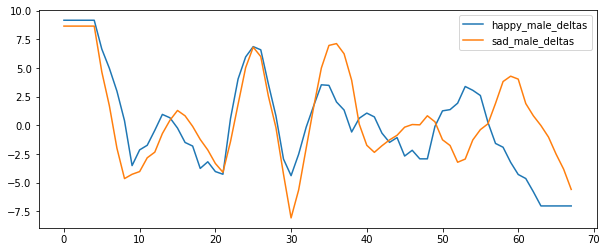

In [77]:
min_frames = min(n_frames1, n_frames2)

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), deltas1[0][0:min_frames], label = 'happy_male_deltas')
sns.lineplot(range(min_frames), deltas2[0][0:min_frames], label = 'sad_male_deltas')
plt.legend(frameon=True)
plt.axis('tight');

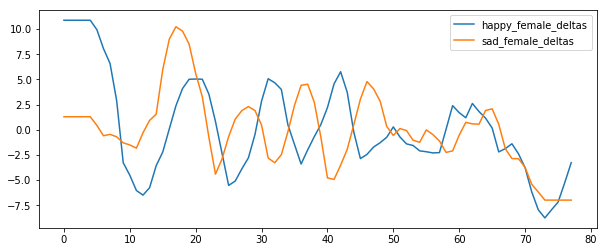

In [78]:
min_frames = min(n_frames3, n_frames4)

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), deltas3[0][0:min_frames], label = 'happy_female_deltas')
sns.lineplot(range(min_frames), deltas4[0][0:min_frames], label = 'sad_female_deltas')
plt.legend(frameon=True)
plt.axis('tight');

In [79]:
mfcc_deltas1 = librosa.feature.delta(mfcc1)
mfcc_deltas2 = librosa.feature.delta(mfcc2)
mfcc_deltas3 = librosa.feature.delta(mfcc3)
mfcc_deltas4 = librosa.feature.delta(mfcc4)

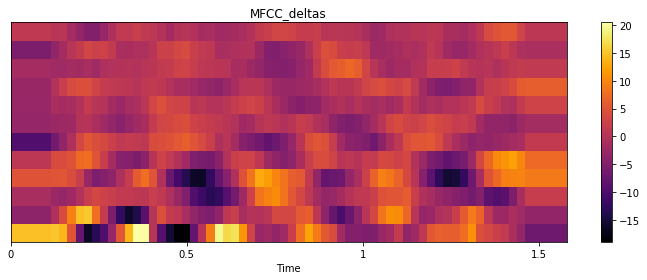

In [80]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas1[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

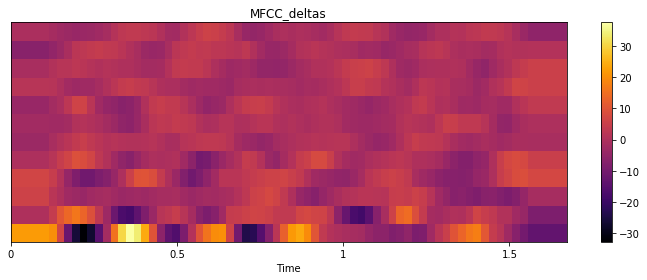

In [81]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas2[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

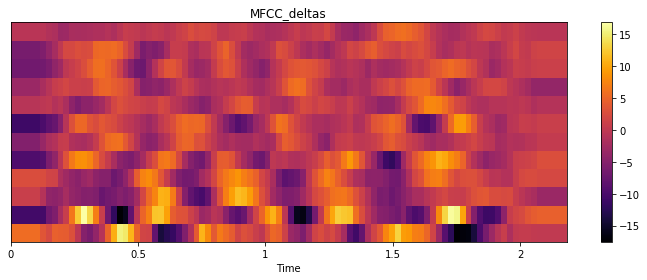

In [82]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas3[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

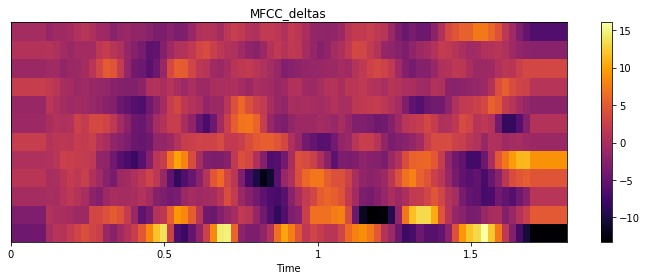

In [83]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas4[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

In [194]:
# Now write a script to pull out audio files, clean them, then save them to clean

import glob

ravdess_file_list = glob.glob('RAVDESS/*/*.wav')

In [192]:
def clean_files(file_list):

    count = 0

    for file in file_list:
        y, sr = librosa.load(file)
        y = envelope(y, sr, 0.0005)
        save_file = 'clean/' + file
        
        if not os.path.exists(os.path.dirname(save_file)):
            try:
                os.makedirs(os.path.dirname(save_file))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        
        with open(save_file, 'w') as new_file:
            sf.write(save_file, y, sr)
            new_file.close()
            
        count += 1
        if count % 100 == 0:
            print('cleaned and saved 100 files')
    
    print("cleaning complete!")

In [195]:
clean_files(ravdess_file_list)

cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaning complete!


In [200]:
tess_file_list = glob.glob('TESS/*.wav')

clean_files(tess_file_list)

cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaning complete!


In [209]:
savee_file_list = glob.glob('SAVEE/*/*/*/*.wav')

clean_files(savee_file_list)

cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaning complete!


In [109]:
# Now that all of the files have been cleaned lets create a simple csv with filenames and basic features

In [215]:
ravdess_clean_list = glob.glob('clean/RAVDESS/*/*.wav')

In [221]:
# Define function for building the RAVDESS index

def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    intensity_key = {'01': 'normal', '02': 'strong'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'intensity': [], 'statement': [], 'repitition': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('RAVDESS')
        
        df['filename'].append(file)

        props = file.split('/')[3].split('.')[0].split('-')
        df['actor'].append(props[6])
        df['emotion'].append(emotion_key[props[2]])
        df['intensity'].append(intensity_key[props[3]])
        df['statement'].append(props[4])
        df['repitition'].append(props[5])

        if int(props[6]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [222]:
ravdess_index = build_ravdess_index(ravdess_clean_list)

In [223]:
# RAVDESS classes are balanced except for neutral

ravdess_index['emotion'].value_counts()

surprised    192
disgusted    192
angry        192
happy        192
sad          192
calm         192
fearful      192
neutral       96
Name: emotion, dtype: int64

In [226]:
savee_clean_list = glob.glob('clean/SAVEE/Data/AudioData/*/*.wav')

In [232]:
savee_clean_list[0].split('/')[5][-6:-4]

'17'

In [237]:
# Define function for building the SAVEE index

def build_savee_index(file_list):
    
    emotion_key = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fearful', 'd': 'disgusted', 'su': 'surprised'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'repitition': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('SAVEE')
        
        df['filename'].append(file)

        props = file.split('/')
        df['actor'].append(props[4])
        df['emotion'].append(emotion_key[props[5][:-6]])
        df['repitition'].append(props[5][-6:-4])
        df['gender'].append('male')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [238]:
savee_index = build_savee_index(savee_clean_list)

In [240]:
# This dataset is reasonably balanced. Appears that I'm missing some of the files from one actor, should be fine though.

savee_index['emotion'].value_counts()

neutral      98
surprised    60
sad          60
happy        45
disgusted    45
angry        45
fearful      45
Name: emotion, dtype: int64

In [258]:
tess_clean_list = glob.glob('clean/TESS/*.wav')

In [264]:
# Define function for building the TESS index

def build_tess_index(file_list):
    
    emotion_key = {'neutral': 'neutral', 'happy': 'happy', 'sad': 'sad', 'angry': 'angry',
                   'fear': 'fearful', 'disgust': 'disgusted', 'ps': 'surprised'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'statement': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('TESS')
        
        df['filename'].append(file)
        
        props = file.split('/')[2].split('_')
        df['actor'].append(props[0])
        df['emotion'].append(emotion_key[props[2][:-4]])
        df['statement'].append(props[1])
        df['gender'].append('female')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [265]:
tess_index = build_tess_index(tess_clean_list)

In [268]:
# Perfectly balanced!

tess_index['emotion'].value_counts()

surprised    400
disgusted    400
sad          400
neutral      400
angry        400
happy        400
fearful      400
Name: emotion, dtype: int64

In [269]:
# Save each index to a csv file

ravdess_index.to_csv('ravdess_index.csv')
savee_index.to_csv('savee_index.csv')
tess_index.to_csv('tess_index.csv')

In [303]:
# Now combine all the dataset indexes into one using their common columns

common_cols = ['dataset', 'filename', 'actor', 'emotion', 'length', 'gender']

complete_index = pd.concat([ravdess_index[common_cols], savee_index[common_cols], tess_index[common_cols]], axis = 0)
complete_index.reset_index(drop = True, inplace = True)

In [304]:
# This is a reasonably balanced dataset except for the emotion 'calm'
# Drop emotion 'calm' from dataset. Is 'calm' even an emotion anyway?

complete_index['emotion'].value_counts()

surprised    652
sad          652
disgusted    637
angry        637
happy        637
fearful      637
neutral      594
calm         192
Name: emotion, dtype: int64

In [306]:
complete_index.shape

(4638, 6)

In [311]:
complete_index = complete_index.drop(list(complete_index[complete_index['emotion'] == 'calm'].index), axis = 0).reset_index(drop = True)

In [312]:
# classes are now much better balanced.

complete_index['emotion'].value_counts()

surprised    652
sad          652
disgusted    637
angry        637
happy        637
fearful      637
neutral      594
Name: emotion, dtype: int64

In [313]:
# Lets split our dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

In [146]:
# To make things simple later I'll just add a column to file_properties that says whether a point is or isn't in test set

In [347]:
# For now I'm not going to worry about using a validation set.
# Later if I want to more finely tune my hyper parameters I just need to uncomment some lines to also get a validation set.

def assign_sets(complete_index):
    train, test = train_test_split(complete_index, test_size = 0.2, random_state = 42)
    #validation, test = train_test_split(_test, test_size = 0.5, random_state = 42)
    
    set_list = []
    
    for file in complete_index['filename']:
        if file in list(train['filename']):
            set_list.append('train')
#         if file in list(validation['filename']):
#             set_list.append('validation')
        if file in list(test['filename']):
            set_list.append('test')
    
    complete_index['set'] = set_list
    
    return complete_index        

In [348]:
complete_index = assign_sets(complete_index)

In [349]:
complete_index[complete_index['set'] == 'train']['emotion'].value_counts()

surprised    537
happy        521
angry        516
disgusted    505
sad          503
fearful      502
neutral      472
Name: emotion, dtype: int64

In [350]:
complete_index[complete_index['set'] == 'train'].shape

(3556, 7)

In [351]:
# complete_index[complete_index['set'] == 'validation']['emotion'].value_counts()

In [352]:
# complete_index[complete_index['set'] == 'validation'].shape

In [353]:
complete_index[complete_index['set'] == 'test']['emotion'].value_counts()

sad          149
fearful      135
disgusted    132
neutral      122
angry        121
happy        116
surprised    115
Name: emotion, dtype: int64

In [354]:
complete_index[complete_index['set'] == 'test'].shape

(890, 7)

In [355]:
complete_index.to_csv('complete_index.csv')